# Poznań - Real estate market analysis

## Description

## 1. Introduce

Main purpose this document is understanding of situation on Poznan flat market. User of this document can analyse data by himself and also take a look into mine findings 
summaries. It's not full market analyse - I have focused only on interesting for me variables and relationships. Have fun!

## 2. Used libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
import scipy
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from scipy import stats
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import style
from IPython.core.display import display, HTML
style.use("fivethirtyeight")

## 3. User-definied functions
Below you can see two functions <i>Range</i> and <i>Histogram</i>. Function <i>Range</i> add to our dataset new column with surfaces ranges.

In [2]:
def Range(surface):
    """Function for creating surface ranges"""
    df = pd.DataFrame(surface)
    list_values = []
    for value in surface.values:
        if value<31:
            list_values.append("0-30")
        elif value<41:
            list_values.append("31-40")
        elif value<51:
            list_values.append("41-50")
        elif value<61:
            list_values.append("51-60")
        elif value<71:
            list_values.append("61-70")
        elif value<81:
            list_values.append("71-80")
        elif value<101:
            list_values.append("81-100")
        elif value is None:
            list_values.append("N/A")
        else:
            list_values.append(">100")
    df["PRZEDZIAŁ_POW"] = list_values
    return df["PRZEDZIAŁ_POW"]

Function <i>Histogram</i> is little more complex - returns histogram for input data.In <i>Histogram</i> you can insert values to filter data it can be price, year of building flat, market type, flat surface, number of rooms and district. But for your comfort I have created special sliders so you don't have to type.

In [3]:
analysis_headers = ["CENA", "CENA_M2", "POWIERZCHNIA", "POKOJE", "ROK_BUDOWY", "DZIELNICA"]
district_headers = ['Antoninek','Zieliniec','Kobylepole','Chartowo','Fabianowo','Kotowo','Główna','Głuszyna',
                    'Górczyn','Grunwald','Jana III Sobieskiego','Jeżyce','Junikowo','Kiekrz','Krzesiny',
                    'Pokrzywno','Garaszewo','Krzyżowniki','Smochowice','Kwiatowe','Ławica','Morasko','Radojewo',
                    'Naramowice','Winogrady','Ogrody','Ostrów Tumski','Śródka','Zawady','Komandoria','Piątkowo',
                    'Podolany','Rataje','Sołacz','Stare Miasto','Stare Winogrady','Starołęka','Minikowo',
                    'Marlewo','Stary Grunwald','Strzeszyn','Szczepankowo','Spławie','Krzesinki','Łazarz',
                    'Świerczewo','Umultowo','Warszawskie','Pomet','Maltańskie','Wilda','Winiary','Wola',
                    'Zielony Dębiec','Żegrze','Dębiec','','NaN','NA']
var_dictionary = {"CENA":"Price", "CENA_M2":"Price_M2", "POWIERZCHNIA":"Surface", "POKOJE":"Rooms", "ROK_BUDOWY":
                 "Year of building", "DZIELNICA":"District"}

In [4]:
def Filtered(dataset, price_min = None, price_max = None, start_year = None, end_year = None, min_surface = None, 
             max_surface = None, min_rooms = None, max_rooms = None, district = None, market = None):
    """function for data filter, return dataframe"""
    
    if price_min is not None:
        dataset = dataset[(dataset["CENA"] >= price_min)]
    if price_max is not None:
        dataset = dataset[(dataset["CENA"] <= price_max)]
    if start_year is not None:
        dataset = dataset[(dataset["ROK_BUDOWY"] >= start_year)]
    if end_year is not None:
        dataset = dataset[(dataset["ROK_BUDOWY"] <= end_year)]
    if min_surface is not None:
        dataset = dataset[(dataset["POWIERZCHNIA"] >= min_surface)]
    if max_surface is not None:
        dataset = dataset[(dataset["POWIERZCHNIA"] <= max_surface)]
    if min_rooms is not None:
        dataset = dataset[(dataset["POKOJE"] >= min_rooms)]
    if max_rooms is not None:
        dataset = dataset[(dataset["POKOJE"] <= max_rooms)]
    if district is not None:
        dataset = dataset[dataset["DZIELNICA"] == district]
    if market is not None:
        dataset = dataset[(dataset["RYNEK"] == market)]
    return dataset

In [5]:
def HistogramPlot(variable, dataset):
    
    data_array = np.array((dataset[[variable]]))
    hist_data = np.histogram(data_array)
    binsize = hist_data[1][1] - hist_data[1][0]
    
    trace1 = go.Histogram(
        x=data_array,
        histnorm='count',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=hist_data[1][0],
            end=hist_data[1][-1],
            size=binsize)
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3
    )
    fig = go.Figure(data=trace_data, layout=layout)
    return py.iplot(fig)
    

In [6]:
def BarPlot():
    pass

In [7]:
def Statistics(dataset):
    df = pd.DataFrame()
    try:
        df = df.append({"Description":"Number of offers all:" , "Value":"{:0,.0f}".format(len(dataset.index))},
                       ignore_index=True)
        df = df.append({"Description":"Number of offers on primary market:" , "Value":"{:0,.0f}".format(len(dataset[(dataset["RYNEK"] == "pierwotny")].index))},
                       ignore_index=True)
        df = df.append({"Description":"Number of offers on secondary market:" , "Value":"{:0,.0f}".format(len(dataset[(dataset["RYNEK"] == "wtórny")].index))},
                       ignore_index=True)
        df = df.append({"Description":"Average price for square meter:" , "Value":"{:0,.0f}".format(dataset["CENA_M2"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average price for square meter primary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA_M2"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average price for square meter secondary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["CENA_M2"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average surface of flat:" , "Value":"{:0,.0f}".format(dataset["POWIERZCHNIA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average surface of flat on primary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["POWIERZCHNIA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average surface of flat on secondary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["POWIERZCHNIA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average price all:" , "Value":"{:0,.0f}".format(dataset["CENA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average price on primary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Average price on secondary market:" , "Value":"{:0,.0f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"].mean())},
                       ignore_index=True)
        df = df.append({"Description":"Max price:" , "Value":"{:0,.0f}".format(max(dataset["CENA"]))},
                       ignore_index=True)
        df = df.append({"Description":"Max price on primary market:" , "Value":"{:0,.0f}".format(max(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"]))},
                       ignore_index=True)
        df = df.append({"Description":"Max price on secondary market:" , "Value":"{:0,.0f}".format(max(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"]))},
                       ignore_index=True)
        df = df.append({"Description":"Min price:" , "Value":"{:0,.0f}".format(min(dataset["CENA"]))},
                       ignore_index=True)
        df = df.append({"Description":"Min price on primary market:" , "Value":"{:0,.0f}".format(min(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"]))},
                       ignore_index=True)
        df = df.append({"Description":"Min price on secondary market:" , "Value":"{:0,.0f}".format(min(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"]))},
                       ignore_index=True)
    except ValueError:
        print("\nWarning: You have set filter on market - some data is unavaiable")
    return display(HTML(df.to_html(index=False)))

In [8]:
def AveragePerVariable(dataset, variable_group, variable_value1, variable_value2, variable_value3):
    dataset = dataset[[variable_group, variable_value1, variable_value2, variable_value3]]
    dataset = dataset.groupby([variable_group]).mean()
    dataset = dataset.sort_values("CENA_M2", ascending = False)
    dataset = dataset.round(0)
    return dataset

In [9]:
def ShapiroResults(dataset, variable):
    shapiro_results = scipy.stats.shapiro(dataset[[variable]])
    if shapiro_results[1] <= 0.0001:
        asterisk = "****"
    elif shapiro_results[1] <=0.001:
        asterisk = "***"
    elif shapiro_results[1] <= 0.01:
        asterisk = "**"
    elif shapiro_results[1] <= 0.01:
        asterisk = "**"
    elif shapiro_results[1] <= 0.05:
        asterisk = "*"
    else:
        asterisk = "ns"
    df = pd.DataFrame()
    df = df.append({"Test for":var_dictionary[variable],"Test Statistics":shapiro_results[0],
                    "p-value":shapiro_results[1], "Label":asterisk}, ignore_index = True)
    df = df[["Test for", "Test Statistics", "p-value", "Label"]]
    return display(HTML(df.to_html(index=False)))
    


## 4. Dataset
Dataset is a csv file and content data about flats for sale in Poznan in February 2018 from website olx.pl. I have collected data by web scraping method. All code for import data is in scripts into repository. In this analyse I use DataFrame from pandas. 

In [10]:
dataset = pd.read_csv("C:/Users/Przemek/PycharmProjects/Real estate scrapping OtoDom/real_estate_data.csv", 
                      sep=";",index_col=2)
dataset = pd.DataFrame(dataset)

In dataset exist duplicated data - for example awarded offers which are on every page, so in below code I delete duplciates data

In [11]:
dataset = dataset[~dataset.index.duplicated(keep="first")]

It is not neccessary but I have added colum with ranges of surface based on function <i>Range</i>

In [12]:
dataset["PRZEDZIAŁ_POW"] = Range(dataset["POWIERZCHNIA"])

# Analysis

## 1. Overall summary

In this point you can see, some particular statistics about data.

In [13]:
Statistics(dataset)

Description,Value
Number of offers all:,"3,214"
Number of offers on primary market:,"1,418"
Number of offers on secondary market:,"1,795"
Average price for square meter:,"6,511"
Average price for square meter primary market:,"6,560"
Average price for square meter secondary market:,"6,471"
Average surface of flat:,60
Average surface of flat on primary market:,56
Average surface of flat on secondary market:,64
Average price all:,"386,197"


## 2. Static analysis of different variables

In this part of statement you can see distribution of different variables with different conditions. For me the most interesting flats are:
* 2/3 rooms
* no matter of type of market
* surface between 40 and 65 square meters
* building shoudn't be old, so year of building > 2005 
* price between 230k and 330k 

At the begginig I use Shapiro Wilk test to ensure, if data with above condtions has normallity distibution.

Let's check data!

## Shapiro Wilk test

* <i>H0:</i> Price per square meter in price range 230k - 330k has normallity distribuation

Filtered data sample has really low p-value, so we don't have reason to exclude <i>H0</i>. We can assume that distribution of Price, Price_M2, Surface, Rooms is normally. It's good news because thanks that we can use a lot of statistician methods for this sample

In [14]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)

ShapiroResults(fdataset,"CENA")
ShapiroResults(fdataset,"CENA_M2")
ShapiroResults(fdataset,"POWIERZCHNIA")
ShapiroResults(fdataset,"POKOJE")

Test for,Test Statistics,p-value,Label
Price,0.969917,3.585473e-13,****


Test for,Test Statistics,p-value,Label
Price_M2,0.991591,0.000028,****


Test for,Test Statistics,p-value,Label
Surface,0.948019,7.441979e-18,****


Test for,Test Statistics,p-value,Label
Rooms,0.570751,2.662467e-43,****


## Price

In [15]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65)
Statistics(fdataset)
HistogramPlot("CENA", fdataset)

Description,Value
Number of offers all:,"1,733"
Number of offers on primary market:,849
Number of offers on secondary market:,884
Average price for square meter:,"6,538"
Average price for square meter primary market:,"6,556"
Average price for square meter secondary market:,"6,520"
Average surface of flat:,51
Average surface of flat on primary market:,51
Average surface of flat on secondary market:,52
Average price all:,"334,757"


In [16]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)
Statistics(fdataset)
HistogramPlot("CENA", fdataset)

Description,Value
Number of offers all:,957
Number of offers on primary market:,490
Number of offers on secondary market:,467
Average price for square meter:,"6,098"
Average price for square meter primary market:,"6,273"
Average price for square meter secondary market:,"5,914"
Average surface of flat:,48
Average surface of flat on primary market:,47
Average surface of flat on secondary market:,49
Average price all:,"291,659"


In [17]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                  price_max = 330000, market = "wtórny")
Statistics(fdataset)
HistogramPlot("CENA", fdataset)

Description,Value
Number of offers all:,467
Number of offers on primary market:,0
Number of offers on secondary market:,467
Average price for square meter:,"5,914"
Average price for square meter primary market:,nan
Average price for square meter secondary market:,"5,914"
Average surface of flat:,49
Average surface of flat on primary market:,nan
Average surface of flat on secondary market:,49
Average price all:,"288,441"


In [18]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000, market = "pierwotny")
Statistics(fdataset)
HistogramPlot("CENA", fdataset)

Description,Value
Number of offers all:,490
Number of offers on primary market:,490
Number of offers on secondary market:,0
Average price for square meter:,"6,273"
Average price for square meter primary market:,"6,273"
Average price for square meter secondary market:,nan
Average surface of flat:,47
Average surface of flat on primary market:,47
Average surface of flat on secondary market:,nan
Average price all:,"294,726"


## Price per square meter

It's short look into distribution of price per square meter for flats where price is in range 230k-330k. After first look into histogram (espacially in scondary market) I noticed that price per square meter can have gausiann distribuation. Related with this findings I check it by Shapiro-Wilk test with 
* <i>H0:</i> Price per square meter in price range 230k - 330k has normallity distribuation

I ommited here global distiribution becuase it is really resemblence like price distribuation.

In [19]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)
HistogramPlot("CENA_M2", fdataset)

In [20]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000, market = "wtórny")
HistogramPlot("CENA_M2", fdataset)

In [21]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000, market = "pierwotny")
HistogramPlot("CENA_M2", fdataset)


## Surface

In [22]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)
HistogramPlot("POWIERZCHNIA", fdataset)

## Rooms

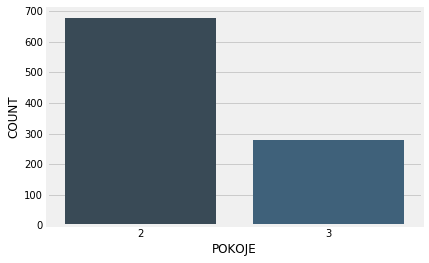

In [23]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)
fdataset = fdataset.groupby(["POKOJE"]).size().reset_index(name="COUNT")
sns.set_palette("Blues_d")
sns.barplot(x="POKOJE",y="COUNT",data=fdataset)


## Bachelor apartment

In [24]:
fdataset = Filtered(dataset, min_rooms = 1, max_rooms = 1)
Statistics(fdataset)
HistogramPlot("CENA_M2", fdataset)

Description,Value
Number of offers all:,272
Number of offers on primary market:,107
Number of offers on secondary market:,165
Average price for square meter:,"7,201"
Average price for square meter primary market:,"7,557"
Average price for square meter secondary market:,"6,971"
Average surface of flat:,34
Average surface of flat on primary market:,35
Average surface of flat on secondary market:,33
Average price all:,"238,480"


In [25]:
fdataset = dataset
AveragePerVariable(fdataset,"DZIELNICA","CENA_M2","POWIERZCHNIA","POKOJE")

,CENA_M2,POWIERZCHNIA,POKOJE
DZIELNICA,,,
Ostrów Tumski,8438.0,37.0,1.0
Stare Miasto,7662.0,64.0,2.0
Sołacz,7457.0,56.0,2.0
Górczyn,6920.0,66.0,3.0
Świerczewo,6833.0,60.0,3.0
Śródka,6812.0,52.0,2.0
Zawady,6787.0,40.0,2.0
Winogrady,6779.0,53.0,2.0
Ławica,6637.0,102.0,4.0


* pobawic sie dzielnicami, jak to sie tam rozklada, sprawdzic srednia cene etc - bardziej takie groupby na pandas dataframe
* sprawdzić korelacje róznych zmiennych, jak na siebie wpływaja
* sprobowac zrobic regresje, svm, drzewo, jakis klasyfikator, porozbijac te dane
* sprawdzic mediany dla tych cen - dodaj to do funkcji statystiki
* zaleznosci mozna na calym zbiorze np cena vs liczba pokoi, cena vs wyposazenie
* cena od powierzchni ale nie histogramy
* ceny wzgledem dzielnic tez na calosci - glownie mediany
* wiecej danych jakosciowych
* sprobuj sie pobawic regresja, svm etc